In [3]:
# import libraries
import pandas as pd

# menambahkan nama kolom
kolom = ['gender', 'car', 'cost', 'income', 'modaltransportasi']

# load dataset
transport = pd.read_csv('transportasi.csv', names=kolom)

In [6]:
# menampilkan data
transport.head()

,gender,car,cost,income,modaltransportasi
0,male,0,cheap,rendah,bus
1,male,1,cheap,sedang,bus
2,female,0,cheap,rendah,bus
3,male,1,cheap,sedang,bus
4,female,1,expensive,tinggi,car


In [7]:
# menampilkan informasi data
transport.describe()

,car
count,10.000000
mean,0.900000
std,0.737865
min,0.000000
25%,0.250000
50%,1.000000
75%,1.000000
max,2.000000


In [10]:
# memisahkan data antara fitur dan kelasnya
fitur = ['gender', 'car', 'cost', 'income']
kelas = ['modaltransportasi']

X = transport[fitur]
y = transport[kelas]

In [11]:
# menampilkan data features (atribut)
X.head()

,gender,car,cost,income
0,male,0,cheap,rendah
1,male,1,cheap,sedang
2,female,0,cheap,rendah
3,male,1,cheap,sedang
4,female,1,expensive,tinggi


In [12]:
# menampilkan data label (kelas)
y.head()

,modaltransportasi
0,bus
1,bus
2,bus
3,bus
4,car


In [14]:
from sklearn import preprocessing

# membuat label encoder -> mengubah variabel string ke angka (sesuai urutan)
lc = preprocessing.LabelEncoder()

# gender female = 0
# gender male = 1

X.gender = lc.fit_transform(X.gender)

# cost cheap = 0 ; standar = 1; expensive = 2

X.cost = lc.fit_transform(X.cost)

# income rendah = 0; sedang = 1; tinggi = 2

X.income = lc.fit_transform(X.income)

In [16]:
# melihat perubahan data
X.head()

,gender,car,cost,income
0,1,0,0,0
1,1,1,0,1
2,0,0,0,0
3,1,1,0,1
4,0,1,2,2


In [27]:
# proses klasifikasi
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# training data
clf = clf.fit(X, y)

# menampilkan akurasi
print("Akurasi : ",clf.score(X, y)*100)

# prediksi model transportasi
y_pred = clf.predict([[1,0,2,1]])
print('Prediksi model X: ', y_pred)

Akurasi :  100.0
Prediksi model X:  ['car']


D:\Application\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


|--- cost <= 1.50
|   |--- cost <= 0.50
|   |   |--- gender <= 0.50
|   |   |   |--- income <= 0.50
|   |   |   |   |--- class: bus
|   |   |   |--- income >  0.50
|   |   |   |   |--- class: train
|   |   |--- gender >  0.50
|   |   |   |--- class: bus
|   |--- cost >  0.50
|   |   |--- class: train
|--- cost >  1.50
|   |--- class: car



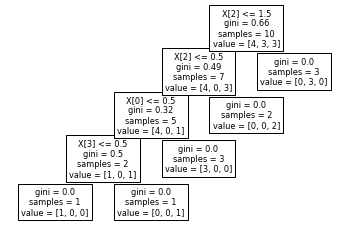

In [29]:
from sklearn import tree
from sklearn.tree.export import export_text
tree.plot_tree(clf.fit(X, y))
r = export_text(clf, feature_names=fitur)
print(r)

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True,rounded=True, special_characters=True, feature_names=fitur,class_names=['bus','car','train'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image('tree.png')


InvocationException: GraphViz's executables not found